ESERCITAZIONE 12: Reti neurali per il riconoscimento di immagini dal dataset MNIST. E' un problema supervisionato di classificazione in cui il dataset è costituito da immagini 28 x 28 pixel con una componente di colore (greyscale) associate a etichette con 10 differenti classi (cifre da 0 a 9).

Esercizio 12.1: Costruzione, addestramento e validazione di una Rete Neurale FeedForward (FFNN) profonda (con almeno due hidden layer) applicata al Dataset MNIST. Per valutare in maniera obiettiva le prestazioni della rete al variare dell'architettura, dal momento che esse presentano una componente di stocasticità per l'addestramento, è opportuno rendere ripetibili le reti imponendo un seed fissato per la generzione di numeri pseudo-casuali. 

In [15]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

#Ripetibilità delle reti costruite -> seed fissato
seed = 0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

#importazione e caricamento del dataset MNIST
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
img_rows, img_cols = 28, 28         # number of pixels 
num_classes = 10                    # 10 digits
Y_train_ = to_categorical(Y_train) # converto etichette di addestramento in vettore one-shot
Y_test_ = to_categorical(Y_test)  # converto etichette di test in vettore one-shot

print("Dimensione del dataset di immagini di addestramento: " , np.shape(X_train))
print("Dimensione del dataset di etichette delle immagini di addestramento: " , np.shape(Y_train))
print("Dimensione del dataset di immagini di test: " , np.shape(X_test))
print("Dimensione del dataset di etichette delle immagini di test: " , np.shape(Y_test))

Dimensione del dataset di immagini di addestramento:  (60000, 28, 28)
Dimensione del dataset di etichette delle immagini di addestramento:  (60000,)
Dimensione del dataset di immagini di test:  (10000, 28, 28)
Dimensione del dataset di etichette delle immagini di test:  (10000,)


E' necessario linearizzare i dati per poterli passare in una FFNN:

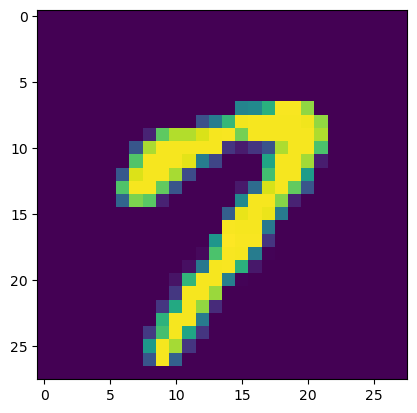

X_train shape: (60000, 784)
X_test shape: (10000, 784)


In [16]:
#stampare un esempio di immagine
plt.imshow(X_train[15,:,:])
plt.show()

#linearizzazione
X_train_ = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test_ = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train_.shape)
print('X_test shape:', X_test_.shape)

# cast to floats
X_train_ = X_train_.astype('float32')
X_test_ = X_test_.astype('float32')

# rescale data in interval [0,1]
X_train_ /= 255
X_test_ /= 255



Costruzione dell'architettura della Rete Neurale FeedForward: bisogna definire rispettivamente i seguenti iperparametri: il numero di hidden layer, il numero di nodi che li costituiscono e le funzioni di attivazione da loro utilizzati.
Naturalmente, il layer di Output deve produrre un vettore di 10 numeri reali in $(0,1)$, corrispondenti alle probabilità (calcolate con la funzione di attivazione Softmax) di appartenere a una determinata classe. L'etichetta predetta sarà la componente con maggiore probabilità.

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def FFNN(N1, N2, N3):
    # instantiate model
    model = Sequential()
    # FIRST HIDDEN LAYER: add a dense all-to-all relu layer
    model.add(Dense(N1,input_shape=(img_rows*img_cols,), activation='relu'))
    # SECOND HIDDEN LAYER: add a dense all-to-all relu layer
    model.add(Dense(N2, activation='relu'))
    # HYPOTETICAL THIRD HIDDEN LAYER: add a dense all-to-all relu layer
    if(N3 !=0):
        model.add(Dense(N3, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # OUTPUT LAYER: soft-max layer 
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

# definisco le dimensioni degli hidden layer
N1 = 200
N2 = 110
N3 = 0

Ora si impostano gli iperparametri che caratterizzano l'addestramento della rete, nello specifico il batch-size $N_b$, il numero di epoche $N_{epo}$, la funzione di costo (si usa solamente l'entropia incrociata) e, chiaramente, la tipologia di algoritmo per l'ottimizzazione nello spazio dei parametri.

In [5]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

N_b = 26
N_epo = 15

def compile_model(N1,N2,N3): #si definisce l'ottimizzazione, che deve tenere conto anche dell'architettura della rete
    # create the model
    model=FFNN(N1,N2,N3)
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

Ora si addestra la rete così costruita sul dataset di addestramento e la si valida sul dataset di test

In [6]:
# create the deep neural net
model_DNN = compile_model(N1,N2,N3)

# train DNN and store training info in history
history = model_DNN.fit(X_train_, Y_train_,
          batch_size=N_b,
          epochs=N_epo,
          verbose=1,
          validation_data=(X_test_, Y_test_))


Epoch 1/15


2308/2308 [==============================] - 10s 4ms/step - loss: 0.7429 - acc: 0.7771 - val_loss: 0.3111 - val_acc: 0.9155
Epoch 2/15
2308/2308 [==============================] - 8s 3ms/step - loss: 0.3724 - acc: 0.8924 - val_loss: 0.2377 - val_acc: 0.9324
Epoch 3/15
2308/2308 [==============================] - 5s 2ms/step - loss: 0.3003 - acc: 0.9128 - val_loss: 0.2009 - val_acc: 0.9419
Epoch 4/15
2308/2308 [==============================] - 5s 2ms/step - loss: 0.2562 - acc: 0.9274 - val_loss: 0.1708 - val_acc: 0.9504
Epoch 5/15
2308/2308 [==============================] - 5s 2ms/step - loss: 0.2244 - acc: 0.9355 - val_loss: 0.1550 - val_acc: 0.9537
Epoch 6/15
2308/2308 [==============================] - 4s 2ms/step - loss: 0.2000 - acc: 0.9432 - val_loss: 0.1391 - val_acc: 0.9583
Epoch 7/15
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1808 - acc: 0.9482 - val_loss: 0.1264 - val_acc: 0.9612
Epoch 8/15
2308/2308 [==============================] - 5s

--- Risultati per (N1,N2,N3) =  200 110 0
313/313 [==============================] - 0s 1ms/step - loss: 0.0864 - acc: 0.9720

Test loss: 0.0864412933588028
Test accuracy: 0.972000002861023


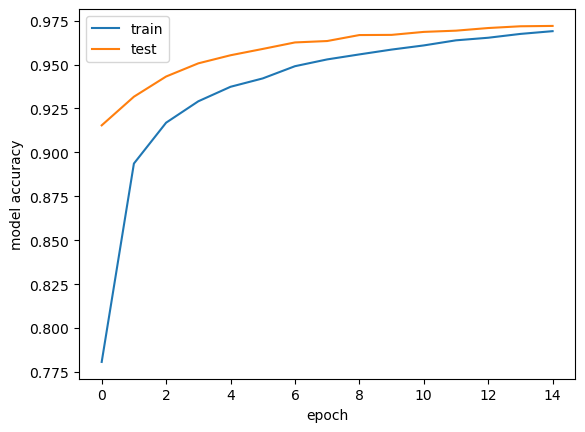

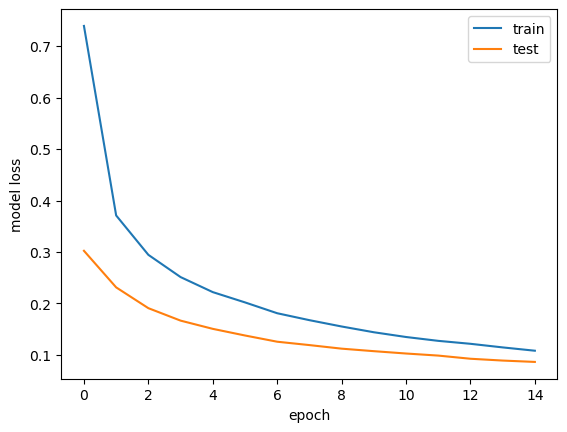

In [171]:
def print_results(): #validazione della rete addestrata e printing dei risultati

    # evaluate model
    score = model_DNN.evaluate(X_test_, Y_test_, verbose=1)

    # print performance
    print()
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    # look into training history

    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('model accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    #plt.title('FFNN @ (N1,N2,N3) = (500,200,0)')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('model loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()
    
print("--- Risultati per (N1,N2,N3) = " , N1,N2,N3)
print_results()

Ricostruisco la rete neurale, imponendo ora un terzo hidden layer, il quale viene scelto con un numero limitato di nodi.

In [172]:
# definisco le dimensioni degli hidden layer
N1 = 200
N2 = 110
N3 = 15

def compile_model(N1,N2,N3): #si definisce l'ottimizzazione, che deve tenere conto anche dell'architettura della rete
    # create the model
    model=FFNN(N1,N2,N3)
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

# create the deep neural net
model_DNN = compile_model(N1,N2,N3)

# train DNN and store training info in history
history = model_DNN.fit(X_train_, Y_train_,
          batch_size=N_b,
          epochs=N_epo,
          verbose=1,
          validation_data=(X_test_, Y_test_))


Epoch 1/15
2308/2308 [==============================] - 4s 2ms/step - loss: 1.3541 - acc: 0.5037 - val_loss: 0.5143 - val_acc: 0.8951
Epoch 2/15
2308/2308 [==============================] - 4s 2ms/step - loss: 0.9600 - acc: 0.6355 - val_loss: 0.3450 - val_acc: 0.9221
Epoch 3/15
2308/2308 [==============================] - 4s 2ms/step - loss: 0.8597 - acc: 0.6722 - val_loss: 0.2729 - val_acc: 0.9382
Epoch 4/15
2308/2308 [==============================] - 4s 2ms/step - loss: 0.7918 - acc: 0.6992 - val_loss: 0.2276 - val_acc: 0.9422
Epoch 5/15
2308/2308 [==============================] - 3s 1ms/step - loss: 0.7381 - acc: 0.7235 - val_loss: 0.1990 - val_acc: 0.9508
Epoch 6/15
2308/2308 [==============================] - 3s 1ms/step - loss: 0.7030 - acc: 0.7318 - val_loss: 0.1815 - val_acc: 0.9536
Epoch 7/15
2308/2308 [==============================] - 3s 1ms/step - loss: 0.6797 - acc: 0.7384 - val_loss: 0.1642 - val_acc: 0.9582
Epoch 8/15
2308/2308 [==============================] - 3s 1ms

Stampo i risultati:

--- Risultati per (N1,N2,N3) =  200 110 15
313/313 [==============================] - 0s 1ms/step - loss: 0.1200 - acc: 0.9717

Test loss: 0.11995968222618103
Test accuracy: 0.9717000126838684


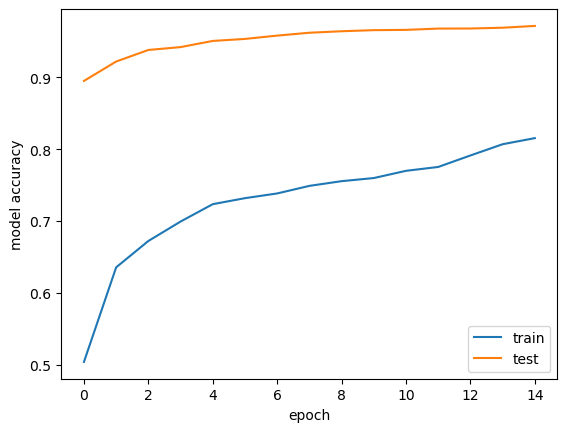

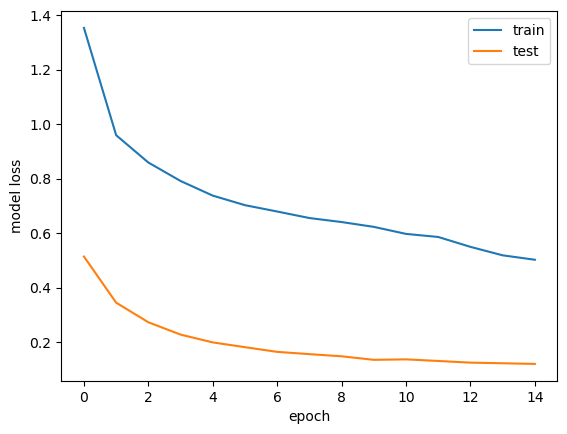

In [173]:
print("--- Risultati per (N1,N2,N3) = " , N1,N2,N3)
print_results()

Si osserva come una scelta di pochi nodi per il terzo hidden layer crea uno spegnimento critico dei suoi neuroni, tramite il dropout che impedisce la generalizzazione del modello ai dati di validazione (overfitting). Si crea una terza FFNN con un numero di nodi $N_3$ per il terzo hidden layer che sia dello stesso ordine di grandezza di $(N_1,N_2)$.

In [174]:
# definisco le dimensioni degli hidden layer
N1 = 200
N2 = 110
N3 = 85

def compile_model(N1,N2,N3): #si definisce l'ottimizzazione, che deve tenere conto anche dell'architettura della rete
    # create the model
    model=FFNN(N1,N2,N3)
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

# create the deep neural net
model_DNN = compile_model(N1,N2,N3)

# train DNN and store training info in history
history = model_DNN.fit(X_train_, Y_train_,
          batch_size=N_b,
          epochs=N_epo,
          verbose=1,
          validation_data=(X_test_, Y_test_))


Epoch 1/15
2308/2308 [==============================] - 4s 2ms/step - loss: 0.7733 - acc: 0.7677 - val_loss: 0.2819 - val_acc: 0.9201
Epoch 2/15
2308/2308 [==============================] - 4s 2ms/step - loss: 0.3509 - acc: 0.9018 - val_loss: 0.2087 - val_acc: 0.9388
Epoch 3/15
2308/2308 [==============================] - 4s 2ms/step - loss: 0.2658 - acc: 0.9263 - val_loss: 0.1627 - val_acc: 0.9498
Epoch 4/15
2308/2308 [==============================] - 4s 2ms/step - loss: 0.2195 - acc: 0.9396 - val_loss: 0.1392 - val_acc: 0.9574
Epoch 5/15
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1848 - acc: 0.9491 - val_loss: 0.1257 - val_acc: 0.9618
Epoch 6/15
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1624 - acc: 0.9550 - val_loss: 0.1138 - val_acc: 0.9657
Epoch 7/15
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1447 - acc: 0.9605 - val_loss: 0.1036 - val_acc: 0.9687
Epoch 8/15
2308/2308 [==============================] - 4s 2ms

Stampo i risultati:

--- Risultati per (N1,N2,N3) =  200 110 85
313/313 [==============================] - 0s 993us/step - loss: 0.0723 - acc: 0.9781

Test loss: 0.07231446355581284
Test accuracy: 0.9781000018119812


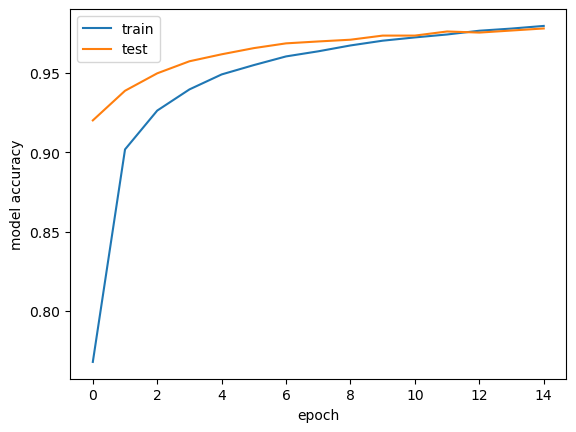

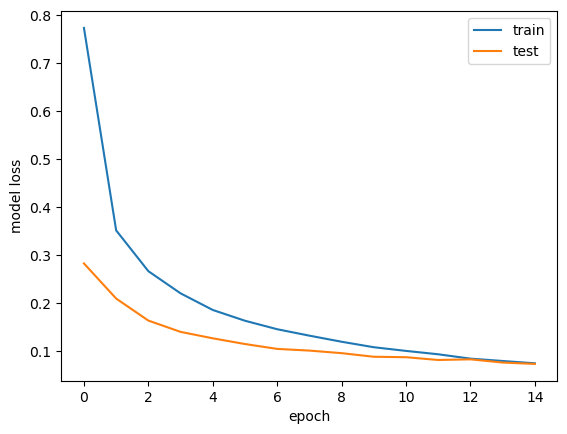

In [175]:
print("--- Risultati per (N1,N2,N3) = " , N1,N2,N3)
print_results()

In questo caso l'accuracy sui dati di validazione supera quella sui dati di addestramento già dopo 12 batch. 

Si prova a costruire un ultimo esempio con un grande numero di nodi per ciascun layer hidden.

In [176]:
# definisco le dimensioni degli hidden layer
N1 = 750
N2 = 500
N3 = 250

def compile_model(N1,N2,N3): #si definisce l'ottimizzazione, che deve tenere conto anche dell'architettura della rete
    # create the model
    model=FFNN(N1,N2,N3)
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

# create the deep neural net
model_DNN = compile_model(N1,N2,N3)

# train DNN and store training info in history
history = model_DNN.fit(X_train_, Y_train_,
          batch_size=N_b,
          epochs=N_epo,
          verbose=1,
          validation_data=(X_test_, Y_test_))

Epoch 1/15
2308/2308 [==============================] - 8s 3ms/step - loss: 0.5612 - acc: 0.8378 - val_loss: 0.2436 - val_acc: 0.9294
Epoch 2/15
2308/2308 [==============================] - 8s 3ms/step - loss: 0.2540 - acc: 0.9273 - val_loss: 0.1831 - val_acc: 0.9454
Epoch 3/15
2308/2308 [==============================] - 8s 3ms/step - loss: 0.1942 - acc: 0.9440 - val_loss: 0.1443 - val_acc: 0.9550
Epoch 4/15
2308/2308 [==============================] - 8s 3ms/step - loss: 0.1581 - acc: 0.9537 - val_loss: 0.1202 - val_acc: 0.9631
Epoch 5/15
2308/2308 [==============================] - 8s 4ms/step - loss: 0.1352 - acc: 0.9611 - val_loss: 0.1066 - val_acc: 0.9667
Epoch 6/15
2308/2308 [==============================] - 8s 4ms/step - loss: 0.1143 - acc: 0.9672 - val_loss: 0.0958 - val_acc: 0.9701
Epoch 7/15
2308/2308 [==============================] - 8s 4ms/step - loss: 0.0998 - acc: 0.9708 - val_loss: 0.0880 - val_acc: 0.9719
Epoch 8/15
2308/2308 [==============================] - 8s 4ms

Stampo i risultati:

--- Risultati per (N1,N2,N3) =  750 500 250
313/313 [==============================] - 1s 2ms/step - loss: 0.0667 - acc: 0.9791

Test loss: 0.06666184216737747
Test accuracy: 0.9790999889373779


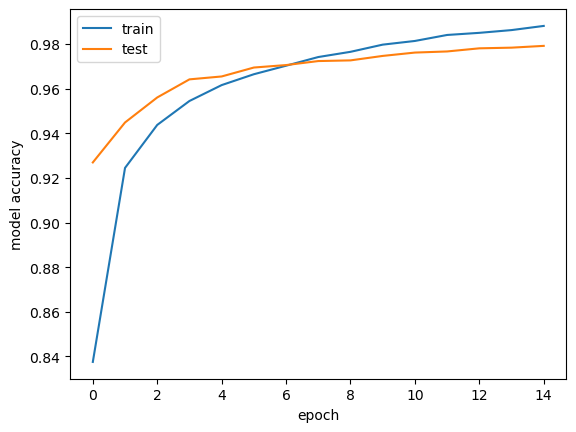

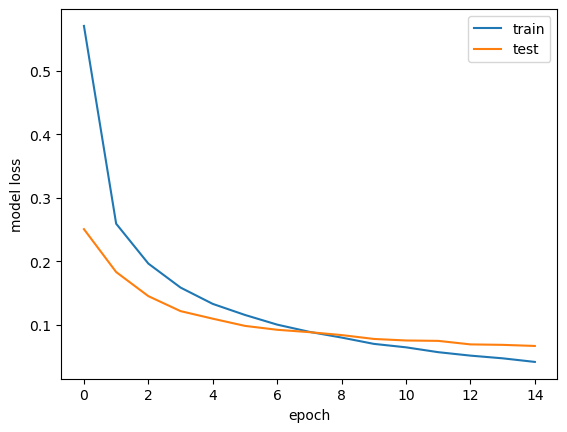

In [163]:
print("--- Risultati per (N1,N2,N3) = " , N1,N2,N3)
print_results()

In conclusione, per assicurare un accuracy superiore al $95 \  \% $ sul dataset di validazione, non è necessario estendere la profondità della rete neurale, ma è sufficiente evitare di restringere il numero di nodi per l'ultimo hidden layer 

Esercizio 12.2: Rete neurale convoluzionale per il riconoscimento di immagini

In [17]:
import tensorflow as tf

from tensorflow.keras import datasets as kdt
from tensorflow.keras import layers,models
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical

def KCNN (input_shape, n_categories, eta, lmbd):
    
    #input_shape = (n_colonne , n_righe , n_colori)
    #n_categories = numero di classi per le etichette
    #eta = velocità di ottimizzazione
    #lmbd = coefficiente della regolarizzazione Ridge
    
    N_filters_1 = 32
    N_filters_2 = 64
    n_neurons_connected = 64
    
    model = Sequential()
    model.add(layers.Conv2D(N_filters_1 , (2,2) , activation = 'relu' , input_shape = input_shape)) #convoluzione: filtro 2 x 2
    model.add(layers.MaxPooling2D( (2,2) )) #pooling 2 x 2
    model.add(layers.Conv2D(N_filters_2 , (3,2) , activation = 'relu')) #convoluzione: filtro 4 x 3
    model.add(layers.MaxPooling2D( (3,3) )) #pooling 2 x 2
    model.add(layers.Conv2D(N_filters_2 , (2,3) , activation = 'relu')) #convoluzione: filtro 3 x 3
    
    #completamento dell'architettura della rete neurale, comprimendo l'ultimo volume di output in un array che si sviluppa 
    #nella dimensione della profondità. Il layer di output ("Dense") lo elabora in un array di probabilità per le etichette:
    
    model.add(layers.Flatten())
    model.add(layers.Dense(n_neurons_connected, activation='relu' , kernel_regularizer=regularizers.l2(lmbd)))
    model.add(layers.Dense(n_categories, activation='softmax', kernel_regularizer=regularizers.l2(lmbd)))
    
    sgd = optimizers.SGD(learning_rate=eta)
    #model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    
    return model

CNN = KCNN((img_rows,img_cols,1), 10, 0.02, 0.01)
CNN.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 12, 64)        12352     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 4, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 64)          24640     
                                                                 
 flatten (Flatten)           (None, 256)             

Si è costruita una rete neurale convoluzionale con tre operazioni di convoluzione e 2 Pooling. La prima convoluzione è stata effettuata su una maschera $3 x 3$, le altre due su maschere rettangolari, rispettivamente $3 x 2$ e $2 x 3$. In questo modo si cerca di diversivicare il più possibile i layer convoluti, cercando anche i pattern orizzontali e verticali presenti nelle immagini.

In [18]:
history = CNN.fit(X_train, Y_train, batch_size = 20, epochs = 10, 
                  validation_data=(X_test, Y_test))

Epoch 1/10


C:\Users\giord\anaconda3\Lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(




3000/3000 [==============================] - 30s 9ms/step - loss: 0.5130 - accuracy: 0.9428 - val_loss: 0.1751 - val_accuracy: 0.9767
Epoch 2/10
3000/3000 [==============================] - 28s 9ms/step - loss: 0.1423 - accuracy: 0.9756 - val_loss: 0.0901 - val_accuracy: 0.9848
Epoch 3/10
3000/3000 [==============================] - 27s 9ms/step - loss: 0.1009 - accuracy: 0.9797 - val_loss: 0.0857 - val_accuracy: 0.9839
Epoch 4/10
3000/3000 [==============================] - 28s 9ms/step - loss: 0.0823 - accuracy: 0.9832 - val_loss: 0.0754 - val_accuracy: 0.9828
Epoch 5/10
3000/3000 [==============================] - 27s 9ms/step - loss: 0.0694 - accuracy: 0.9856 - val_loss: 0.0757 - val_accuracy: 0.9837
Epoch 6/10
3000/3000 [==============================] - 28s 9ms/step - loss: 0.0620 - accuracy: 0.9872 - val_loss: 0.0657 - val_accuracy: 0.9862
Epoch 7/10
3000/3000 [==============================] - 28s 9ms/step - loss: 0.0552 - accuracy: 0.9882 - val_loss: 0.0734 - val_accuracy: 0

313/313 [==============================] - 2s 6ms/step
Le predizioni per le etichette, fornite come vettori di probabilità, sono riportate nell'ordine in cui sono visualizzate le immagini: 
[9.9999976e-01 2.7892990e-09 9.1869143e-09 4.8498394e-10 8.4806073e-09
 1.0865305e-09 6.3756566e-08 1.7991042e-09 8.0498303e-08 3.9497333e-10]
[7.3418749e-05 4.7421156e-05 1.4780925e-04 6.4038078e-04 1.8353884e-03
 2.9799659e-04 1.8511033e-05 2.4035724e-03 4.8608653e-04 9.9404943e-01]
[2.6114105e-07 8.4913641e-09 1.7581447e-08 1.5548043e-08 2.7197459e-06
 6.2908856e-09 9.9999702e-01 5.1841464e-09 1.5321742e-08 6.1657506e-09]
[1.6334380e-10 1.4763802e-07 1.7105799e-08 1.3937572e-10 1.4805841e-08
 3.8192251e-08 1.4959858e-09 9.9999416e-01 2.5500183e-10 5.6204976e-06]
[1.6499445e-07 1.6967742e-09 4.6410173e-09 3.8142995e-09 4.9373796e-07
 3.0080660e-10 9.9999928e-01 8.1350959e-10 1.9535166e-08 2.4271307e-09]
[2.5067820e-08 2.6611049e-09 2.3929694e-08 4.1857351e-07 1.0933044e-05
 1.0781109e-07 1.3806422

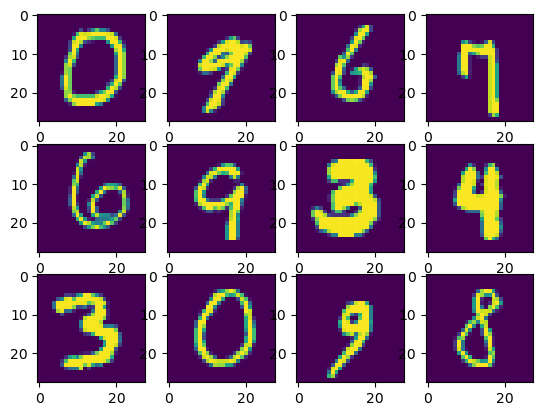

In [27]:
Y_predict = CNN.predict(X_test)

print("Le predizioni per le etichette, fornite come vettori di probabilità, sono riportate nell'ordine in cui sono visualizzate le immagini: ")

plt.subplot(3,4,1)
plt.imshow(X_test[10])
print(Y_predict[10])

plt.subplot(3,4,2)
plt.imshow(X_test[20])
print(Y_predict[20])

plt.subplot(3,4,3)
plt.imshow(X_test[50])
print(Y_predict[50])

plt.subplot(3,4,4)
plt.imshow(X_test[80])
print(Y_predict[80])

plt.subplot(3,4,5)
plt.imshow(X_test[100])
print(Y_predict[100])

plt.subplot(3,4,6)
plt.imshow(X_test[150])
print(Y_predict[150])

plt.subplot(3,4,7)
plt.imshow(X_test[200])
print(Y_predict[200])

plt.subplot(3,4,8)
plt.imshow(X_test[250])
print(Y_predict[250])

plt.subplot(3,4,9)
plt.imshow(X_test[500])
print(Y_predict[500])

plt.subplot(3,4,10)
plt.imshow(X_test[750])
print(Y_predict[750])

plt.subplot(3,4,11)
plt.imshow(X_test[1000])
print(Y_predict[1000])

plt.subplot(3,4,12)
plt.imshow(X_test[1200])
print(Y_predict[1200])


Si evidenzia come la rete neurale convoluzionale sia altamente efficiente rispetto alla FFNN, dal momento che sfrutta la struttura 2D dei dati per addestrare il modello direttamente dall'informazione locale (ovvero i blocchi di pixel adiacenti) delle immagini. I predittori per le etichette forniscono un vettore di probabilità, in cui l'elemento in corrsipondenza dell'etichetta di addestramento tende a 1, il che indica la robustezza dell'algoritmo nell'assegnare le istanze di test alla corretta classe.

Esercizio_12.3: Si applica la rete neurale addestrata sul MNIST ad una collezione di $12$ immagini con cifre disegnate a mano.

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import glob
from PIL import Image

image_list = []
label_list = [8,1,2,7,6,9,1,5,3,4,4,3]  

#dimensione di ciascuna immagine
dim = 28
standard_size = (dim,dim)

for filename in glob.glob("Cifre_28x28_bmp/*.bmp"):
    im = Image.open(filename)  #lettura dell'immagine .jpg
    im = im.resize(standard_size)  # riscalamento dell'immagine ad una dimensione standardizzata
    im.load()                  #caricamento dell'immagine
    im = np.array(im)          #conversione dell'immagine in un tensore RGB di dimensioni ((standard_size),3)
    image_list.append(im/255.0)      #inserimento dell'immagine nel dataset

X = np.array(image_list)
Y = np.array(label_list)

Una volta caricato il dataset di 12 immagini, si procede a validare su tali dati la rete neurale CNN precedentemente addestrata:

1/1 [==============================] - 0s 130ms/step
Le predizioni per le etichette, fornite come vettori di probabilità, sono riportate nell'ordine in cui sono visualizzate le immagini: 
[0.11231813 0.13315597 0.09439644 0.07802275 0.09629573 0.11896865
 0.09023654 0.0924731  0.10755129 0.07658141]
[0.11232217 0.1331482  0.09439912 0.07802366 0.09629523 0.11896988
 0.09023716 0.09247132 0.10755348 0.07657972]
[0.11231797 0.13315567 0.09439813 0.07802264 0.09629563 0.11896641
 0.09023597 0.09247465 0.1075514  0.07658157]
[0.11232407 0.13314609 0.09440129 0.07802602 0.09629453 0.11897039
 0.09023803 0.09246511 0.10755666 0.0765778 ]
[0.11231797 0.13315447 0.09439804 0.07802176 0.09629613 0.11896821
 0.09023621 0.09247541 0.10754994 0.07658189]
[0.11231994 0.13315392 0.09439777 0.0780227  0.09629605 0.11896613
 0.09023609 0.09247422 0.10755158 0.07658159]
[0.11232328 0.133155   0.09439807 0.07802459 0.09629467 0.11896925
 0.09023788 0.09246425 0.10755431 0.07657859]
[0.11231659 0.1331502

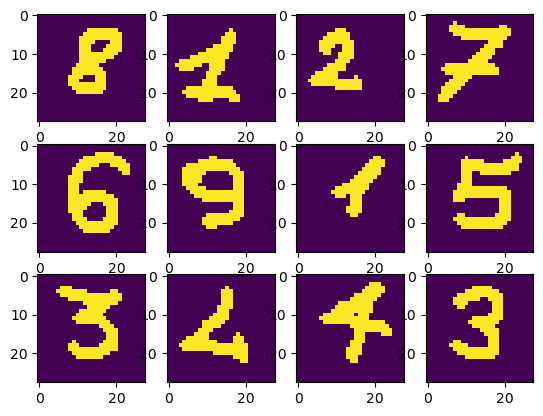

In [29]:
Y_predict = CNN.predict(X)

print("Le predizioni per le etichette, fornite come vettori di probabilità, sono riportate nell'ordine in cui sono visualizzate le immagini: ")

plt.subplot(3,4,1)
plt.imshow(X[0])
print(Y_predict[0])

plt.subplot(3,4,2)
plt.imshow(X[1])
print(Y_predict[1])

plt.subplot(3,4,3)
plt.imshow(X[2])
print(Y_predict[2])

plt.subplot(3,4,4)
plt.imshow(X[3])
print(Y_predict[3])

plt.subplot(3,4,5)
plt.imshow(X[4])
print(Y_predict[4])

plt.subplot(3,4,6)
plt.imshow(X[5])
print(Y_predict[5])

plt.subplot(3,4,7)
plt.imshow(X[6])
print(Y_predict[6])

plt.subplot(3,4,8)
plt.imshow(X[7])
print(Y_predict[7])

plt.subplot(3,4,9)
plt.imshow(X[8])
print(Y_predict[8])

plt.subplot(3,4,10)
plt.imshow(X[9])
print(Y_predict[9])

plt.subplot(3,4,11)
plt.imshow(X[10])
print(Y_predict[10])

plt.subplot(3,4,12)
plt.imshow(X[11])
print(Y_predict[11])

Aver salvato le immagini in un formato monocolore, il quale cancella le gradazioni di grigio, si è rivelato un errore, dal momento che la rete neurale addestrata sul MNIST non è in grado di generalizzare correttamente il nuovo dataset. Infatti, tutti i vettori per le predizioni delle etichette contengono probabilità, per le singole classi, mai superiori al $20 \ \%$, ovvero il sistema non riesce a identificare le cifre.